$\textbf{PROGRAMMING ASSIGNMENT}$
---

# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

In [5]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
heart_disease = fetch_ucirepo(id=45) 

X = heart_disease.data.features 
y = heart_disease.data.targets 
  
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

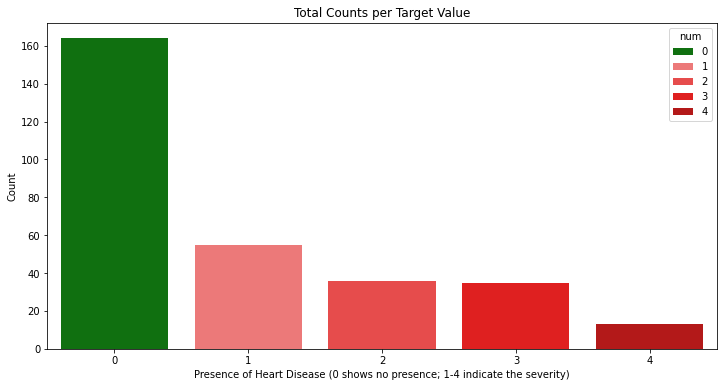

In [7]:
df = pd.concat([X, y], axis=1)

plt.figure(figsize=(12, 6))

palette = {0: 'green', 1: '#ff6666', 2: '#ff3333', 3: '#ff0000', 4: '#cc0000'}
sns.countplot(x='num', hue='num', data=df, palette=palette)

plt.title('Total Counts per Target Value')

plt.xlabel('Presence of Heart Disease (0 shows no presence; 1-4 indicate the severity)')
plt.ylabel('Count')

plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

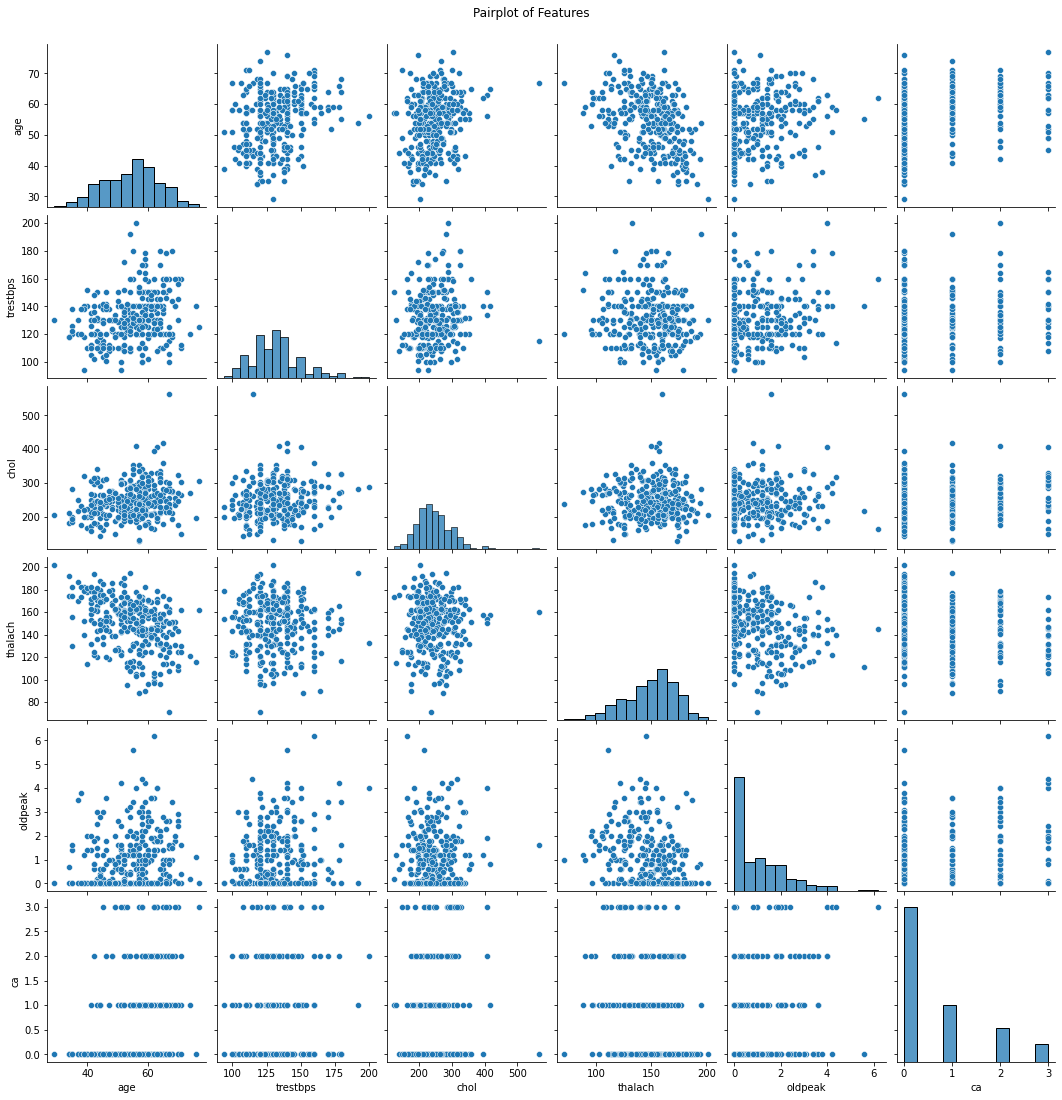

In [8]:
# Didn't specify which columns, so I chose the features of type Integer
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

sns.pairplot(df[columns])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

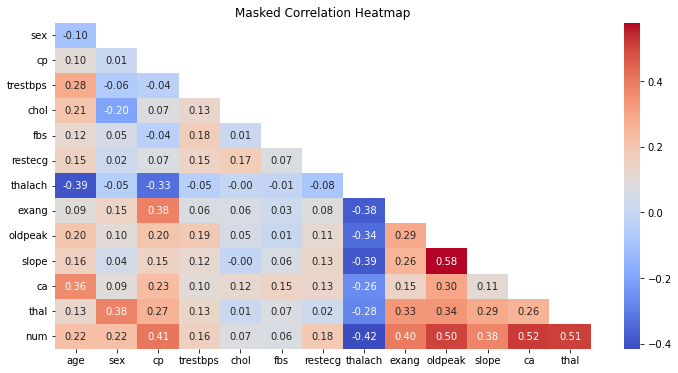

In [9]:
correlation_matrix = df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(12, 6))

sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Masked Correlation Heatmap')
plt.show()

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [10]:
X = df.drop(columns=['num'])
y = df['num']

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nan_indices = np.isnan(X_train_scaled).any(axis=1)

X_train_scaled_clean = X_train_scaled[~nan_indices]
y_train_clean = y_train[~nan_indices]

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [13]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_scaled)

lr_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=42, max_iter=1000)
lr_cv.fit(X_train_scaled_clean, y_train_clean)

c_val = lr_cv.C_[0]

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [14]:
print("The optimal C value is: ", c_val)

The optimal C value is:  0.3593813663804626


### Coeffecients

**TASK: Report back the model's coefficients.**

In [15]:
coefficients = lr_cv.coef_

print("Model Coefficients:\n")
max_len = max(len(feature) for feature in X.columns) + 1

for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature.ljust(max_len)}: {coef:>7.4f}")

Model Coefficients:

age      :  0.0096
sex      : -0.3006
cp       : -0.4677
trestbps : -0.2984
chol     : -0.2578
fbs      :  0.2378
restecg  : -0.1501
thalach  :  0.2738
exang    : -0.3296
oldpeak  : -0.4069
slope    : -0.3538
ca       : -0.9830
thal     : -0.6984


**Task: Create a visualization of the coefficients.**

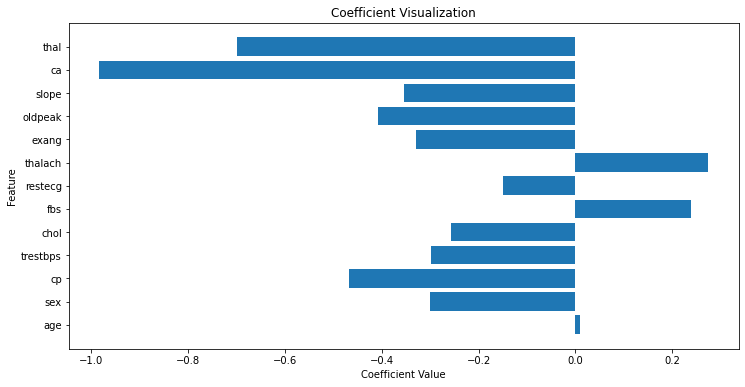

In [16]:
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients[0])

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.title('Coefficient Visualization')

plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report


Confusion Matrix Array:
[[5 0 2 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]] 




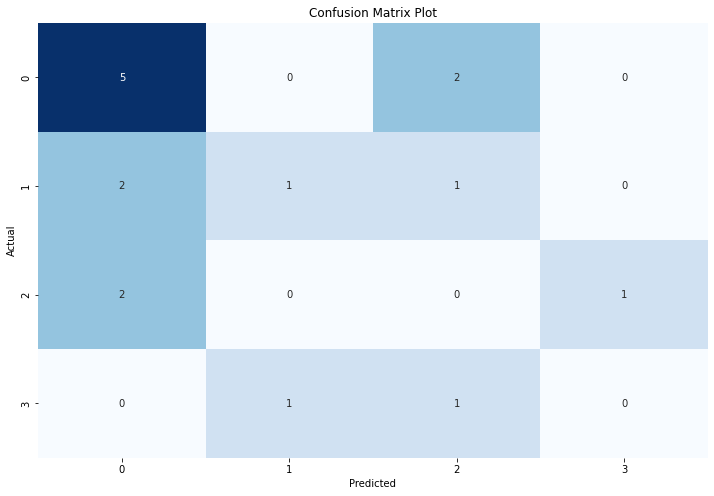


Classification Report: 

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16



In [17]:
y_pred = lr_cv.predict(X_test_scaled)

# Confusion Matrix Array
conf_matrix_arr = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Array:")
print(conf_matrix_arr, "\n\n")

# Confusion Matrix Plot
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_arr, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Plot')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show() 

# Classification Report
y_pred = lr_cv.predict(X_test_scaled)

print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

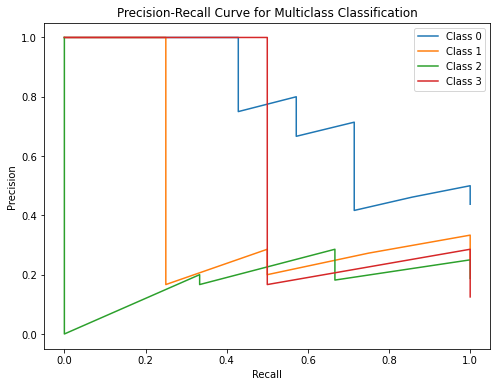

In [18]:
classes=[0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve for Multiclass Classification')

plt.legend(loc='best')
plt.show()

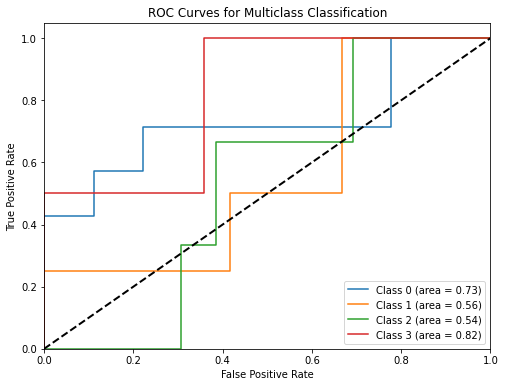

In [24]:
classes = [0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curves for Multiclass Classification')

plt.legend(loc="lower right")

plt.show()